In [19]:
import requests
from bs4 import BeautifulSoup

# from google.colab import files

fuel_cons = ([7.8, 12.43, 19.49, 24.6, 31.8, 7.8, 12.43, 19.49, 24.6, 31.8, 5, 40])

url_req = (['?imei=352094089278805&s_dt=2022-08-10%2011:50:00&e_dt=2022-08-10%2012:22:55',
            '?imei=352094089278805&s_dt=2022-08-10%2011:50:00&e_dt=2022-08-10%2012:48:24',
            '?imei=352094089278805&s_dt=2022-08-10%2011:50:00&e_dt=2022-08-10%2013:19:41',
            '?imei=352094089278805&s_dt=2022-08-10%2011:50:00&e_dt=2022-08-10%2013:46:25',
            '?imei=352094089278805&s_dt=2022-08-10%2011:50:00&e_dt=2022-08-10%2014:21:59',
            '?imei=352094089278805&s_dt=2022-08-10%2011:50:00&e_dt=2022-08-10%2012:22:55',
            '?imei=352094089278805&s_dt=2022-08-10%2011:50:00&e_dt=2022-08-10%2012:48:24',
            '?imei=352094089278805&s_dt=2022-08-10%2011:50:00&e_dt=2022-08-10%2013:19:41',
            '?imei=352094089278805&s_dt=2022-08-10%2011:50:00&e_dt=2022-08-10%2013:46:25',
            '?imei=352094089278805&s_dt=2022-08-10%2011:50:00&e_dt=2022-08-10%2014:21:59',
            '?imei=352094089278805&s_dt=2022-08-10%2011:50:00&e_dt=2022-08-10%2014:45:00',
            '?imei=352094089278805&s_dt=2022-08-16%2008:00:00&e_dt=2022-08-16%2017:30:00'])

web_link = 'https://nav.by/info/testAccel.php'

db_files = []

### postman
import requests

url = "https://nav.by/login_get_data.php?type=LOGIN&data%5Blogin%5D=diler_el_vek&data%5Bpwd%5D=111111&data%5BscreenWidth%5D=1920&data%5BscreenHeight%5D=1080"

payload = {}
headers = {
    'Cookie': 'pc_id=60b9bbc0-bef7-4c4b-9052-003672c5d1a9; ses_id=15fb4b00-046b-4e59-bd88-175381dd03b8'
}

response = requests.request("GET", url, headers=headers, data=payload)

print(response.text)


### postman

def remove_str(value, deletechars_):
    for c in deletechars_:
        value = value.replace(c, '_')
    return value


NUM_OF_FILES = len(url_req)
for p in range(NUM_OF_FILES):

    name_of_file = remove_str(url_req[p], '\/:*?"<>|&%=-')
    db_files.append(name_of_file)

    print(name_of_file)

    file = open(name_of_file + ".csv", "w")
    file.close()

    response = requests.request("GET", web_link + url_req[p], headers=headers, data=payload)
    soup = BeautifulSoup(response.text, 'lxml')

    file = open(name_of_file + ".csv", "a+")

    quotes = soup.find_all('p')
    for quote in quotes:
        file.write(quote.text)
    file.close()

    file = open(name_of_file + ".csv", "r")
    lines = file.readlines()
    file.close()

    f_first_line = 1

    file = open(name_of_file + ".csv", "w")
    for line in lines:
        if f_first_line == 1:
            file.write(line)
            f_first_line = 0
        if ((
                line != "date;speed;78;64011;64022;64033;64044;delta64011;delta64022;delta64033;delta64044;vodo;lat;lon;dir;alt;engine_speed;distance_gps;201;202;203;204;210;211;212;213;214;215;ain1;ain2\n") and (
                line != "\n")):
            file.write(line)
    file.close()

{"url":".\/info\/help.php","exitCode":0}
_imei_352094089278805_s_dt_2022_08_10_2011_50_00_e_dt_2022_08_10_2012_22_55
_imei_352094089278805_s_dt_2022_08_10_2011_50_00_e_dt_2022_08_10_2012_48_24
_imei_352094089278805_s_dt_2022_08_10_2011_50_00_e_dt_2022_08_10_2013_19_41
_imei_352094089278805_s_dt_2022_08_10_2011_50_00_e_dt_2022_08_10_2013_46_25
_imei_352094089278805_s_dt_2022_08_10_2011_50_00_e_dt_2022_08_10_2014_21_59
_imei_352094089278805_s_dt_2022_08_10_2011_50_00_e_dt_2022_08_10_2012_22_55
_imei_352094089278805_s_dt_2022_08_10_2011_50_00_e_dt_2022_08_10_2012_48_24
_imei_352094089278805_s_dt_2022_08_10_2011_50_00_e_dt_2022_08_10_2013_19_41
_imei_352094089278805_s_dt_2022_08_10_2011_50_00_e_dt_2022_08_10_2013_46_25
_imei_352094089278805_s_dt_2022_08_10_2011_50_00_e_dt_2022_08_10_2014_21_59
_imei_352094089278805_s_dt_2022_08_10_2011_50_00_e_dt_2022_08_10_2014_45_00
_imei_352094089278805_s_dt_2022_08_16_2008_00_00_e_dt_2022_08_16_2017_30_00


In [20]:
import math
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
from array import array

sns.set(style="darkgrid")

In [21]:
from scipy.optimize import curve_fit

# initial guesses for k1, k2, k3, k4, k5, k6:
kfc_init = 1.0, 1.0, 1.0, 1.0, 1.0
kfc2_init = 1.0, 1.0, 1.0, 1.0, 1.0
kfc3_init = 1.0, 1.0, 1.0, 1.0

def func_fuel_consumption(x, k1, k2, k3, k4, k5):
    delta_es_, delta_es_app_, delta_es_2_app_, delta_es_app_2_, delta_es_2_app_2_ = x
    return k1 * delta_es_ + k2 * delta_es_app_ + k3 * delta_es_2_app_ + k4 * delta_es_app_2_ + k5 * delta_es_2_app_2_

def func2_fuel_consumption(x, k1, k2, k3, k4, k5):
    delta_es_app_, delta_es_2_app_, delta_es_app_2_, delta_es_2_app_2_ = x
    return k1 + k2 * delta_es_app_ + k3 * delta_es_2_app_ + k4 * delta_es_app_2_ + k5 * delta_es_2_app_2_

def func3_fuel_consumption(x, k2, k3, k4, k5):
    delta_es_app_, delta_es_2_app_, delta_es_app_2_, delta_es_2_app_2_ = x
    return k2 * delta_es_app_ + k3 * delta_es_2_app_ + k4 * delta_es_app_2_ + k5 * delta_es_2_app_2_


len(_imei_352094089278805_s_dt_2022_08_10_2011_50_00_e_dt_2022_08_10_2012_22_55):548
[871]
len(_imei_352094089278805_s_dt_2022_08_10_2011_50_00_e_dt_2022_08_10_2012_48_24):1085
[871, 1602]
len(_imei_352094089278805_s_dt_2022_08_10_2011_50_00_e_dt_2022_08_10_2013_19_41):1725
[871, 1602, 2483]
len(_imei_352094089278805_s_dt_2022_08_10_2011_50_00_e_dt_2022_08_10_2013_46_25):2289
[871, 1602, 2483, 3265]
len(_imei_352094089278805_s_dt_2022_08_10_2011_50_00_e_dt_2022_08_10_2014_21_59):3014
[871, 1602, 2483, 3265, 4257]
[-0.00839234  0.03822747 -0.05160831 -0.02194318  0.04311096]
[-0.02778107 -0.0033525   0.00315663  0.00872943 -0.00486589]
[-0.003225    0.00305287  0.0088544  -0.00519862]
[-0.00839234  0.03822747 -0.05160831 -0.02194318  0.04311096]
len(_imei_352094089278805_s_dt_2022_08_10_2011_50_00_e_dt_2022_08_10_2012_22_55):548
[871, 1602, 2483, 3265, 4257, 871]
len(_imei_352094089278805_s_dt_2022_08_10_2011_50_00_e_dt_2022_08_10_2012_48_24):1085


C:\anaconda3\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


[871, 1602, 2483, 3265, 4257, 871, 1602]
len(_imei_352094089278805_s_dt_2022_08_10_2011_50_00_e_dt_2022_08_10_2013_19_41):1725
[871, 1602, 2483, 3265, 4257, 871, 1602, 2483]
len(_imei_352094089278805_s_dt_2022_08_10_2011_50_00_e_dt_2022_08_10_2013_46_25):2289
[871, 1602, 2483, 3265, 4257, 871, 1602, 2483, 3265]
len(_imei_352094089278805_s_dt_2022_08_10_2011_50_00_e_dt_2022_08_10_2014_21_59):3014
[871, 1602, 2483, 3265, 4257, 871, 1602, 2483, 3265, 4257]
len(_imei_352094089278805_s_dt_2022_08_10_2011_50_00_e_dt_2022_08_10_2014_45_00):3500
[871, 1602, 2483, 3265, 4257, 871, 1602, 2483, 3265, 4257, 4912]
len(_imei_352094089278805_s_dt_2022_08_16_2008_00_00_e_dt_2022_08_16_2017_30_00):11083
[871, 1602, 2483, 3265, 4257, 871, 1602, 2483, 3265, 4257, 4912, 13437]
[7.8, 12.43, 19.49, 24.6, 31.8, 5, 40]
[7.800000000000004, 12.429999999999986, 19.489999999999995, 24.600000000000023, 31.799999999999955, 36.392710688630984, 122.66236776362086]
[7.800000000000011, 12.430000000000007, 19.4899999999

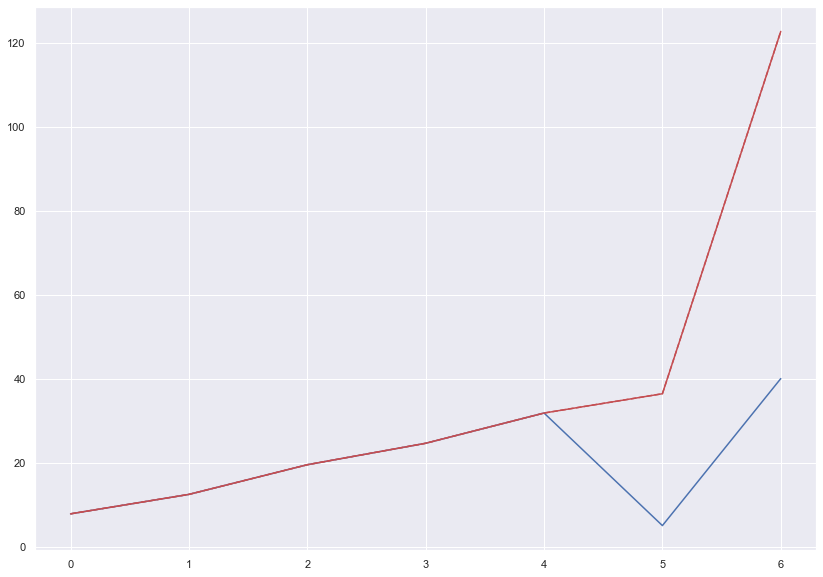

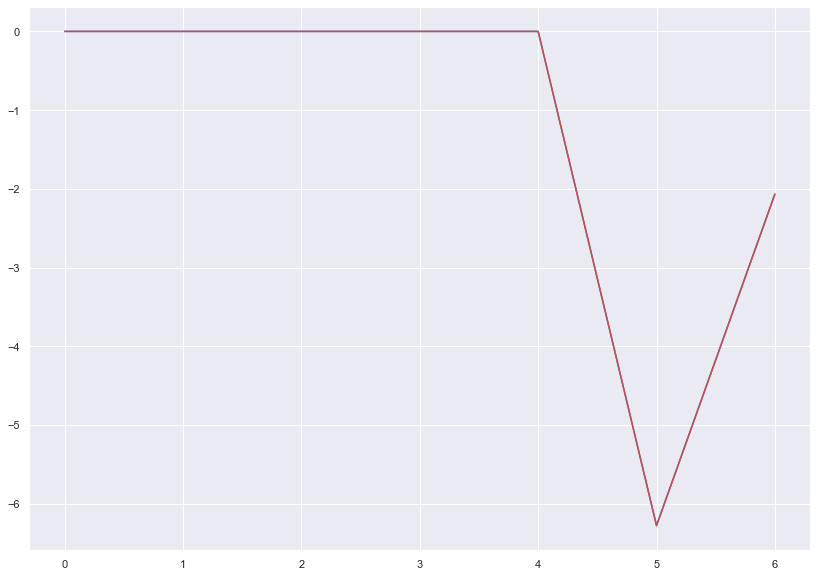

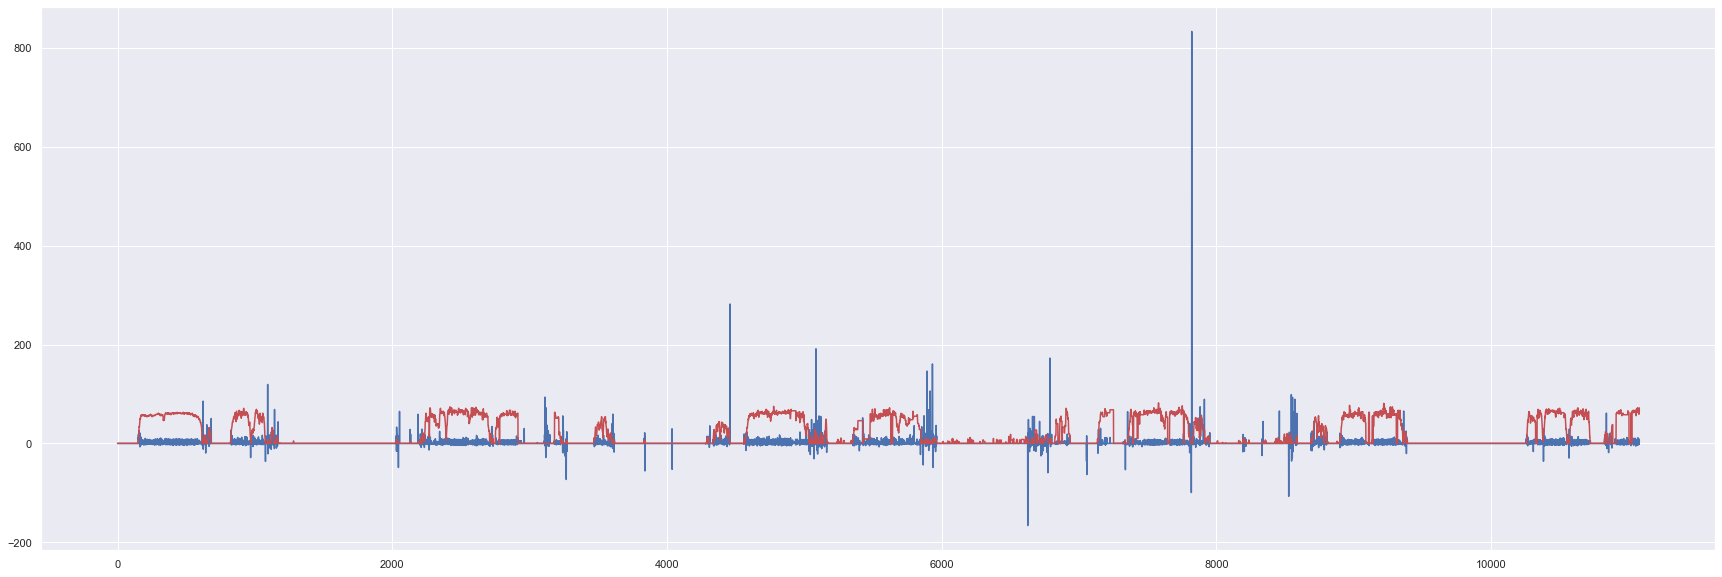

In [26]:
NUM_OF_FILES = len(db_files)

num_points = [0] * NUM_OF_FILES

delta_ES = []
delta_ES_APP = []
delta_ES_2_APP = []
delta_ES_APP_2 = []
delta_ES_2_APP_2 = []
delta_level_dut = []
delta_level_dut_calc = []
delta_level_dut_calc2 = []
delta_level_dut_ctrl = []
eps_level = []
eps2_level = []

inst_cons = []
inst_speed = []
inst_acc_plus = []
inst_acc_minus = []

popt_calc = []
popt2_calc = []
popt3_calc = []

popt_calc2 = []
matrix_linear = []

for p in range(NUM_OF_FILES):
    df = pd.read_csv(db_files[p] + '.csv', sep=';', engine='python', decimal=',')
    df.columns = ['date', 'speed', 'rowdata', 'z', 'y', 'x_m', 'x_p', 'delta64011', 'delta64022', 'delta64033',
                  'delta64044', 'vodo', 'lat', 'lon', 'dir', 'alt', 'engine_speed', 'distance_gps', 'sum_ES',
                  'mark_ind1', 'sum_ES_APP', 'mark_ind2', 'sum_ES_2_APP', 'mark_ind3', 'sum_ES_APP_2', 'mark_ind4',
                  'sum_ES_2_APP_2', 'mark_ind5', 'AnIn1', 'AnIn2']

    print('len(' + db_files[p] + '):' + str(len(df)))

    df["consum_l"] = 0.0
    df["consum_t"] = 0.0

    sum_ES_sum = 0
    sum_ES_APP_sum = 0
    sum_ES_2_APP_sum = 0
    sum_ES_APP_2_sum = 0
    sum_ES_2_APP_2_sum = 0

    AnIn1_begin = 0

    sum_ES_prev = 0
    sum_ES_APP_prev = 0
    sum_ES_2_APP_prev = 0
    sum_ES_APP_2_prev = 0
    sum_ES_2_APP_2_prev = 0
    AnIn1_prev = 0

    sum_ES_inst = 0
    sum_ES_APP_inst = 0
    sum_ES_2_APP_inst = 0
    sum_ES_APP_2_inst = 0
    sum_ES_2_APP_2_inst = 0

    k = 1

    for i in range(2, len(df)):

        if df.sum_ES[i] != 0 and df.sum_ES[i] == df.sum_ES[i] and df.sum_ES[i] > sum_ES_prev:
            if sum_ES_prev != 0:
                sum_ES_inst = df.sum_ES[i] - sum_ES_prev
                sum_ES_sum += sum_ES_inst
            else:
                sum_ES_inst = 0
            sum_ES_prev = df.sum_ES[i]
        else:
            sum_ES_inst = 0

        if df.sum_ES_APP[i] != 0 and df.sum_ES_APP[i] == df.sum_ES_APP[i] and df.sum_ES_APP[i] > sum_ES_APP_prev:
            if sum_ES_APP_prev != 0:
                sum_ES_APP_inst = df.sum_ES_APP[i] - sum_ES_APP_prev
                sum_ES_APP_sum += sum_ES_APP_inst
            else:
                sum_ES_APP_inst = 0
            sum_ES_APP_prev = df.sum_ES_APP[i]
        else:
            sum_ES_APP_inst = 0

        if df.sum_ES_2_APP[i] != 0 and df.sum_ES_2_APP[i] == df.sum_ES_2_APP[i] and df.sum_ES_2_APP[
            i] > sum_ES_2_APP_prev:
            if sum_ES_2_APP_prev != 0:
                sum_ES_2_APP_inst = df.sum_ES_2_APP[i] - sum_ES_2_APP_prev
                sum_ES_2_APP_sum += sum_ES_2_APP_inst
            else:
                sum_ES_2_APP_inst = 0
            sum_ES_2_APP_prev = df.sum_ES_2_APP[i]
        else:
            sum_ES_2_APP_inst = 0

        if df.sum_ES_APP_2[i] != 0 and df.sum_ES_APP_2[i] == df.sum_ES_APP_2[i] and df.sum_ES_APP_2[
            i] > sum_ES_APP_2_prev:
            if sum_ES_APP_2_prev != 0:
                sum_ES_APP_2_inst = df.sum_ES_APP_2[i] - sum_ES_APP_2_prev
                sum_ES_APP_2_sum += sum_ES_APP_2_inst
            else:
                sum_ES_APP_2_inst = 0
            sum_ES_APP_2_prev = df.sum_ES_APP_2[i]
        else:
            sum_ES_APP_2_inst = 0

        if df.sum_ES_2_APP_2[i] != 0 and df.sum_ES_2_APP_2[i] == df.sum_ES_2_APP_2[i] and df.sum_ES_2_APP_2[
            i] > sum_ES_2_APP_2_prev:
            if sum_ES_2_APP_2_prev != 0:
                sum_ES_2_APP_2_inst = df.sum_ES_2_APP_2[i] - sum_ES_2_APP_2_prev
                sum_ES_2_APP_2_sum += sum_ES_2_APP_2_inst
            else:
                sum_ES_2_APP_2_inst = 0
            sum_ES_2_APP_2_prev = df.sum_ES_2_APP_2[i]
        else:
            sum_ES_2_APP_2_inst = 0

        if p == 11:
            # inst_cons.append((1/df.distance_gps[i])*func_fuel_consumption(
            #     (sum_ES_inst, sum_ES_APP_inst, sum_ES_2_APP_inst, sum_ES_APP_2_inst, sum_ES_2_APP_2_inst),
            #     popt_calc[0], popt_calc[1], popt_calc[2], popt_calc[3], popt_calc[4]))

            consum_l = 0
            consum_t = 0

            if df.distance_gps[i] != 0:
                consum_l = (1/df.distance_gps[i])*func3_fuel_consumption(
                    (sum_ES_APP_inst, sum_ES_2_APP_inst, sum_ES_APP_2_inst, sum_ES_2_APP_2_inst),
                    popt3_calc[0], popt3_calc[1], popt3_calc[2], popt3_calc[3])
            # if consum_l > 50:
            #     consum_l = 50
            df.at[i, 'consum_l'] = consum_l

            d_time = (datetime.strptime(df.date[i], "%Y-%m-%d %H:%M:%S.%f") - datetime.strptime(df.date[i-1], "%Y-%m-%d %H:%M:%S.%f")).seconds
            if d_time != 0:
                consum_t = (1/d_time)*func3_fuel_consumption(
                    (sum_ES_APP_inst, sum_ES_2_APP_inst, sum_ES_APP_2_inst, sum_ES_2_APP_2_inst),
                    popt3_calc[0], popt3_calc[1], popt3_calc[2], popt3_calc[3])
            df.at[i, 'consum_t'] = consum_t

            inst_cons.append(consum_l*10)
            inst_speed.append(df.speed[i])
            acc_delta = 10*df.delta64044[i]
            if acc_delta < 0:
                acc_delta = 0
            if acc_delta > 50:
                acc_delta = 50
            inst_acc_plus.append(acc_delta)
            acc_delta = -10*df.delta64033[i]
            if acc_delta > 0:
                acc_delta = 0
            if acc_delta < -50:
                acc_delta = -50
            inst_acc_minus.append(acc_delta)

    if p == 11:
        df.to_csv(db_files[p] + '_changed' + '.csv', index=False)

    delta_ES.append(sum_ES_sum)
    delta_ES_APP.append(sum_ES_APP_sum)
    delta_ES_2_APP.append(sum_ES_2_APP_sum)
    delta_ES_APP_2.append(sum_ES_APP_2_sum)
    delta_ES_2_APP_2.append(sum_ES_2_APP_2_sum)

    print(delta_ES)

    matrix_linear.append(
        [delta_ES[-1], delta_ES_APP[-1], delta_ES_2_APP[-1], delta_ES_APP_2[-1], delta_ES_2_APP_2[-1]])
    if p < 5:
        delta_level_dut.append(fuel_cons[p])
    if p == 4:
        popt, pcov = curve_fit(func_fuel_consumption,
                               (delta_ES, delta_ES_APP, delta_ES_2_APP, delta_ES_APP_2, delta_ES_2_APP_2),
                               delta_level_dut, kfc_init)
        popt_calc = popt
        print(popt_calc)

        popt, pcov = curve_fit(func2_fuel_consumption,
                               (delta_ES_APP, delta_ES_2_APP, delta_ES_APP_2, delta_ES_2_APP_2),
                               delta_level_dut, kfc2_init)
        popt2_calc = popt
        print(popt2_calc)

        popt, pcov = curve_fit(func3_fuel_consumption,
                               (delta_ES_APP, delta_ES_2_APP, delta_ES_APP_2, delta_ES_2_APP_2),
                               delta_level_dut, kfc3_init)
        popt3_calc = popt
        print(popt3_calc)
        #popt3_calc = [-0.002340876, 0.001463682, 0.008092307, -0.003850765]
        popt3_calc = [0.003276728, -0.008181688, 0.004813692, -3.33334E-05]

        popt_calc2 = np.linalg.solve(np.array(matrix_linear), np.array(delta_level_dut))
        print(popt_calc2)

    if p >= 5:
        delta_level_dut_ctrl.append(fuel_cons[p])

        delta_level_dut_calc.append(func_fuel_consumption(
            (delta_ES[-1], delta_ES_APP[-1], delta_ES_2_APP[-1], delta_ES_APP_2[-1], delta_ES_2_APP_2[-1]),
            popt_calc[0], popt_calc[1], popt_calc[2], popt_calc[3], popt_calc[4]))
        delta_level_dut_calc2.append(func_fuel_consumption(
            (delta_ES[-1], delta_ES_APP[-1], delta_ES_2_APP[-1], delta_ES_APP_2[-1], delta_ES_2_APP_2[-1]),
            popt_calc2[0], popt_calc2[1], popt_calc2[2], popt_calc2[3], popt_calc2[4]))

    if p == (NUM_OF_FILES - 1):
        print(delta_level_dut_ctrl)
        print(delta_level_dut_calc)
        print(delta_level_dut_calc2)

        plt.figure(figsize=(14, 10))
        plt.plot(delta_level_dut_ctrl, 'b')
        plt.plot(delta_level_dut_calc, 'r')
        plt.plot(delta_level_dut_calc2, 'r--')
        plt.show()

        for jg in range(len(delta_level_dut_ctrl)):
            eps_level.append((delta_level_dut_ctrl[jg] - delta_level_dut_calc[jg]) / delta_level_dut_ctrl[jg])
            eps2_level.append((delta_level_dut_ctrl[jg] - delta_level_dut_calc2[jg]) / delta_level_dut_ctrl[jg])

        plt.figure(figsize=(14, 10))
        plt.plot(eps_level, 'b')
        plt.plot(eps2_level, 'r')
        plt.show()

        plt.figure(figsize=(30, 10))
        plt.plot(inst_cons, 'b')
        plt.plot(inst_speed, 'r')
        # plt.plot(inst_acc_plus, 'g')
        # plt.plot(inst_acc_minus, 'k')
        plt.show()
